In [ ]:
# Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingRegressor
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
df=pd.read_csv('/content/SeoulBikeData.csv')

In [ ]:
df.head(5)


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01-12-2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01-12-2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01-12-2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01-12-2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01-12-2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
df.shape

(8760, 14)

In [ ]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
#count of missing values in each column.
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [ ]:
# Checking Duplicate Values
duplicates =len(df[df.duplicated()])
print(duplicates)

0


In [ ]:
#checking for unique values

df.nunique().sort_values(ascending=True)

Holiday                         2
Functioning Day                 2
Seasons                         4
Hour                           24
Snowfall (cm)                  51
Rainfall(mm)                   61
Wind speed (m/s)               65
Humidity(%)                    90
Solar Radiation (MJ/m2)       345
Date                          365
Temperature(°C)               546
Dew point temperature(°C)     556
Visibility (10m)             1789
Rented Bike Count            2166
dtype: int64

In [ ]:
#utilizing Date column for more valuable information

import datetime as dt
df['date'] = df['Date'].apply(lambda x: dt.datetime.strptime(x,"%d-%m-%Y"))

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day_name()

In [ ]:
#creating a new column of "weekdays_weekend"
df['week']=df['day'].apply(lambda x : "weekend" if x=='Saturday' or x=='Sunday' else "weekday" )

# checking no of years
df['week'].value_counts()

weekday    6264
weekend    2496
Name: week, dtype: int64

In [ ]:
#drop the column "Date","day","year"

df=df.drop(columns=['date','day','year'],axis=1)

So I convert the "date" column into 3 different column i.e "year","month","day". The "year" column in our data set is basically contain the 2 unique number contains the details of from 2017 december to 2018 november so if i consider this is a one year then we don't need the "year" column so we drop it. The other column "day", it contains the details about the each day of the month, for our relevence we don't need each day of each month data but we need the data about, if a day is a weekday or a weekend so we convert it into this format and drop the "day" column.

In [ ]:
df.head(2)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,week
0,01-12-2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,weekday
1,01-12-2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,weekday


In [ ]:
#Change the int64 column into catagory column
cols=['Hour','month','week']
for col in cols:
  df[col]=df[col].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Date                       8760 non-null   object  
 1   Rented Bike Count          8760 non-null   int64   
 2   Hour                       8760 non-null   category
 3   Temperature(°C)            8760 non-null   float64 
 4   Humidity(%)                8760 non-null   int64   
 5   Wind speed (m/s)           8760 non-null   float64 
 6   Visibility (10m)           8760 non-null   int64   
 7   Dew point temperature(°C)  8760 non-null   float64 
 8   Solar Radiation (MJ/m2)    8760 non-null   float64 
 9   Rainfall(mm)               8760 non-null   float64 
 10  Snowfall (cm)              8760 non-null   float64 
 11  Seasons                    8760 non-null   object  
 12  Holiday                    8760 non-null   object  
 13  Functioning Day            8760 n

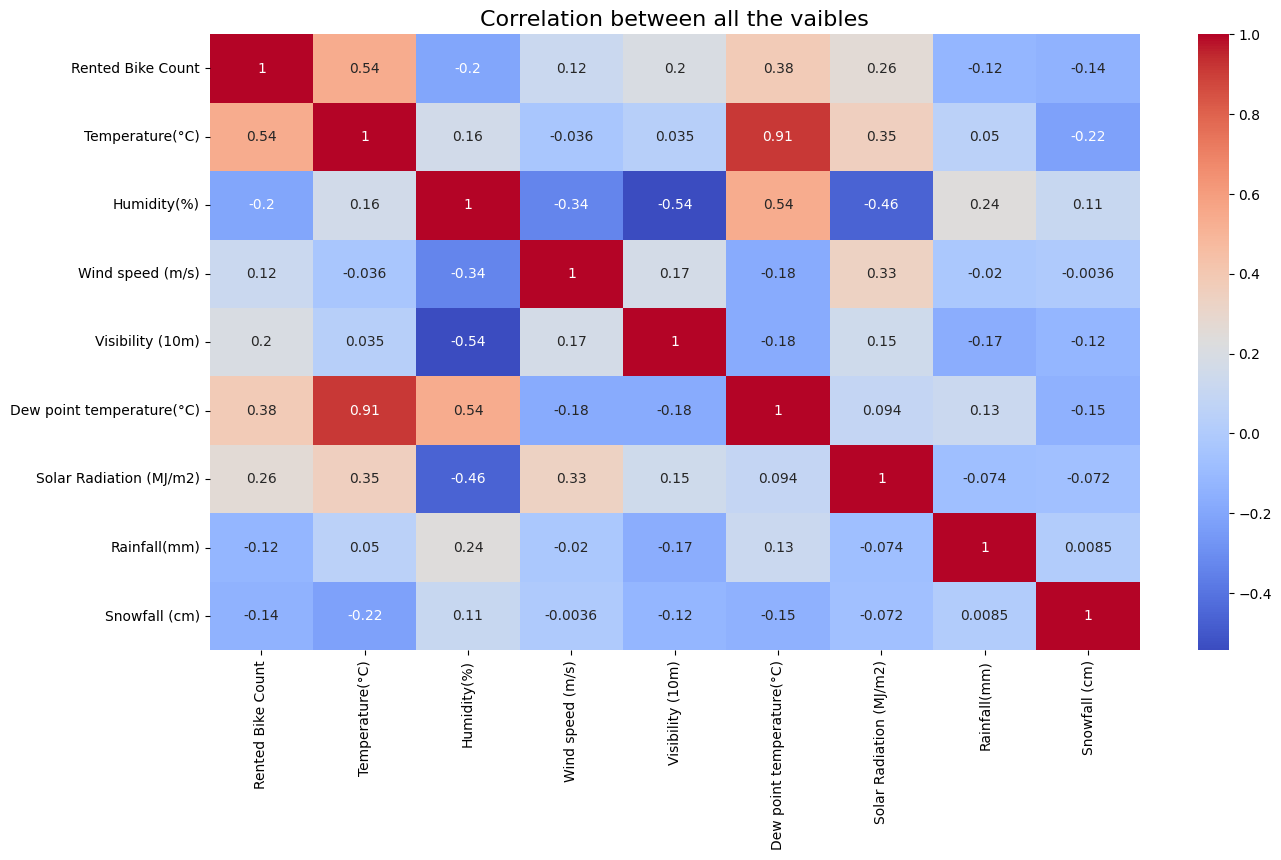

In [ ]:
#Heatmap for co-relation in features
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between all the vaibles', size=16)
plt.show()

From the above experiment i can conclude that Temperature and Dew point temperature(°C) has the high correlation . we drop this column then it dont affects the outcome of our analysis

In [ ]:
df.drop(columns= ['Dew point temperature(°C)'], inplace=True)

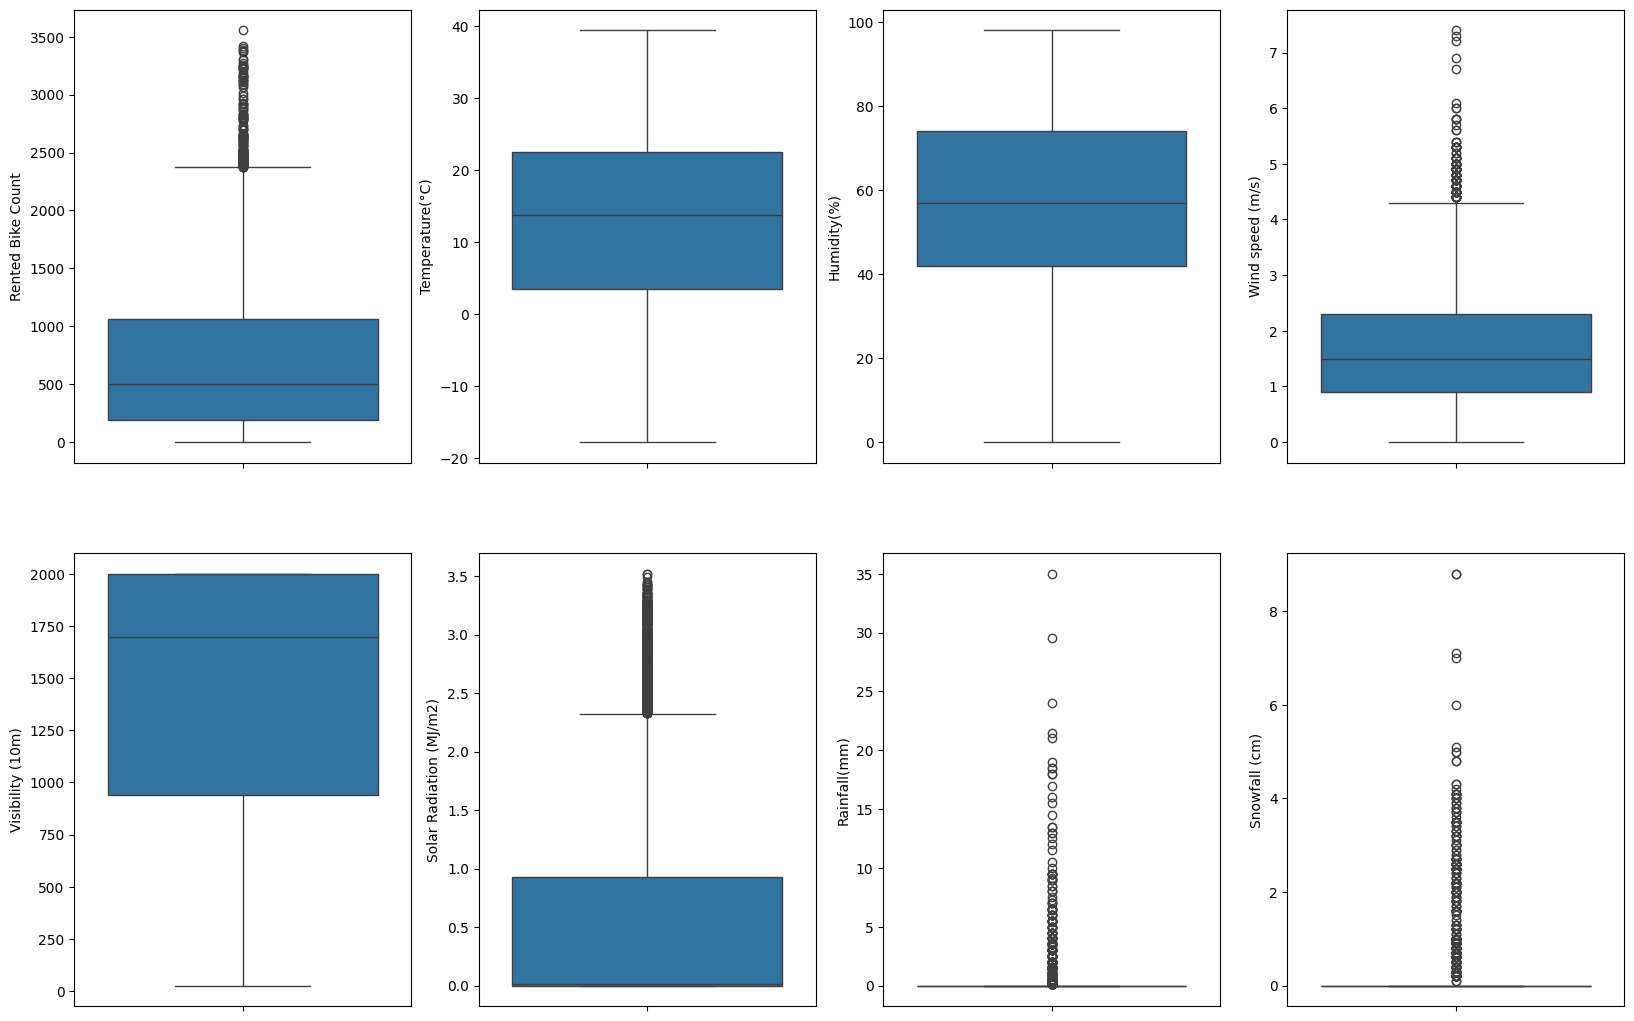

In [ ]:
# looking for outliers using box plot

plt.figure(figsize=(20,20))
for index,item in enumerate([i for i in df.describe().columns.to_list()]):
  plt.subplot(3,4,index+1)
  sns.boxplot(df[item])

In [ ]:
# finding the inter-quartile range

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Rented Bike Count           874.25
Temperature(°C)              19.00
Humidity(%)                  32.00
Wind speed (m/s)              1.40
Visibility (10m)           1060.00
Solar Radiation (MJ/m2)       0.93
Rainfall(mm)                  0.00
Snowfall (cm)                 0.00
dtype: float64


In [ ]:
# listing features to remove outliers

features = list(df.columns)
features = features[2:]
list_0 = ['Hour','Seasons','Holiday','Functioning Day','month','year','week']
new_features = [x for x in features if x not in list_0]
new_features

['Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)']

In [ ]:
# removing outliers

df[new_features] = df[new_features][~((df[new_features] < (Q1 - 1.5 * IQR)) |(df[new_features] > (Q3 + 1.5 * IQR))).any(axis=1)]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Date                     8760 non-null   object  
 1   Rented Bike Count        8760 non-null   int64   
 2   Hour                     8760 non-null   category
 3   Temperature(°C)          7078 non-null   float64 
 4   Humidity(%)              7078 non-null   float64 
 5   Wind speed (m/s)         7078 non-null   float64 
 6   Visibility (10m)         7078 non-null   float64 
 7   Solar Radiation (MJ/m2)  7078 non-null   float64 
 8   Rainfall(mm)             7078 non-null   float64 
 9   Snowfall (cm)            7078 non-null   float64 
 10  Seasons                  8760 non-null   object  
 11  Holiday                  8760 non-null   object  
 12  Functioning Day          8760 non-null   object  
 13  month                    8760 non-null   category
 14  week    

In [ ]:
# filling null values with mean values

df['Temperature(°C)'] = df['Temperature(°C)'].fillna(df['Temperature(°C)'].mean())
df['Humidity(%)'] = df['Humidity(%)'].fillna(df['Humidity(%)'].mean())
df['Wind speed (m/s)'] = df['Wind speed (m/s)'].fillna(df['Wind speed (m/s)'].mean())
df['Visibility (10m)'] = df['Visibility (10m)'].fillna(df['Visibility (10m)'].mean())

df['Solar Radiation (MJ/m2)'] = df['Solar Radiation (MJ/m2)'].fillna(df['Solar Radiation (MJ/m2)'].mean())
df['Rainfall(mm)'] = df['Rainfall(mm)'].fillna(df['Rainfall(mm)'].mean())
df['Snowfall (cm)'] = df['Snowfall (cm)'].fillna(df['Snowfall (cm)'].mean())

In [ ]:
df.isna().sum()

Date                       0
Rented Bike Count          0
Hour                       0
Temperature(°C)            0
Humidity(%)                0
Wind speed (m/s)           0
Visibility (10m)           0
Solar Radiation (MJ/m2)    0
Rainfall(mm)               0
Snowfall (cm)              0
Seasons                    0
Holiday                    0
Functioning Day            0
month                      0
week                       0
dtype: int64

## **Performing EDA**

[Text(0.5, 1.0, 'Count of Rented bikes acording to Month ')]

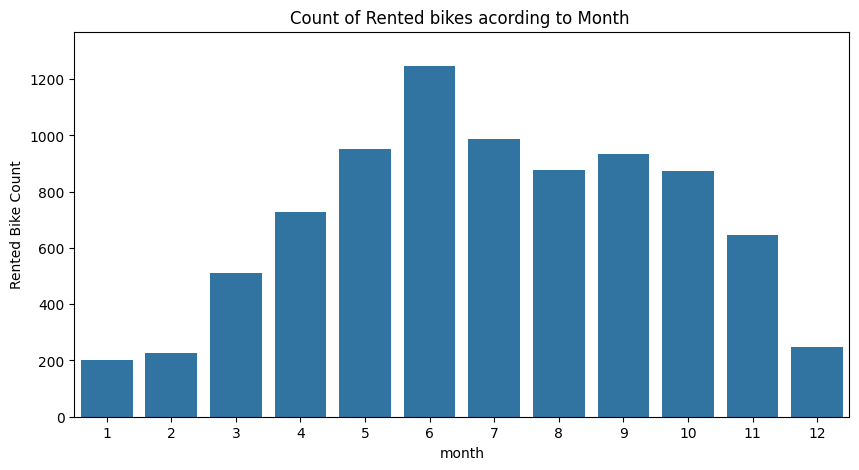

In [ ]:
#Month
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(10,5))
sns.barplot(data=df,x='month',y='Rented Bike Count',ax=ax,capsize=0,errwidth=0)
ax.set(title='Count of Rented bikes acording to Month ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to weekdays_weekenday ')]

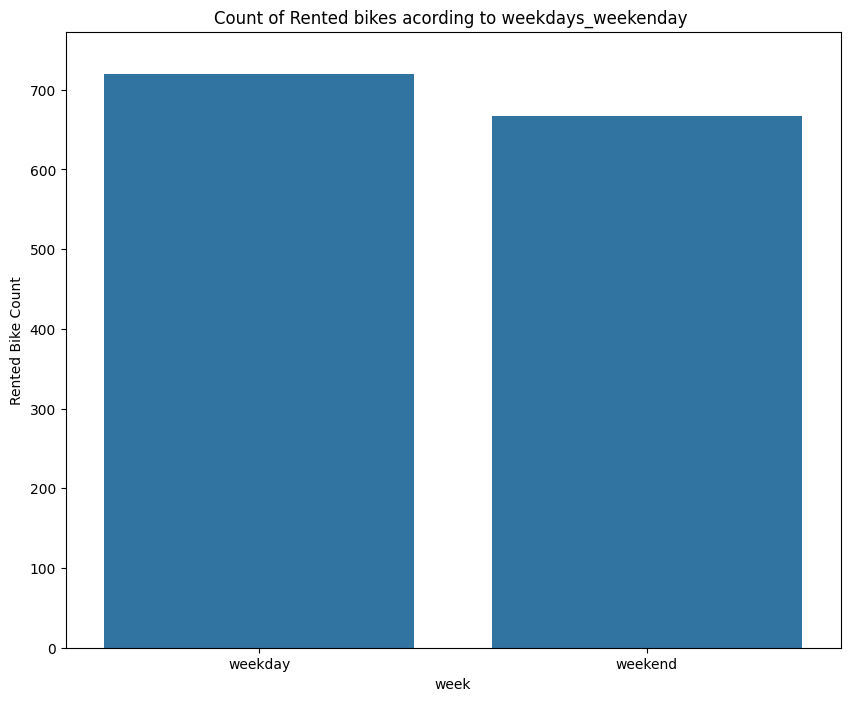

In [ ]:
#week
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=df,x='week',y='Rented Bike Count',ax=ax,capsize=.2,errwidth=0)
ax.set(title='Count of Rented bikes acording to weekdays_weekenday ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to weekdays_weekend ')]

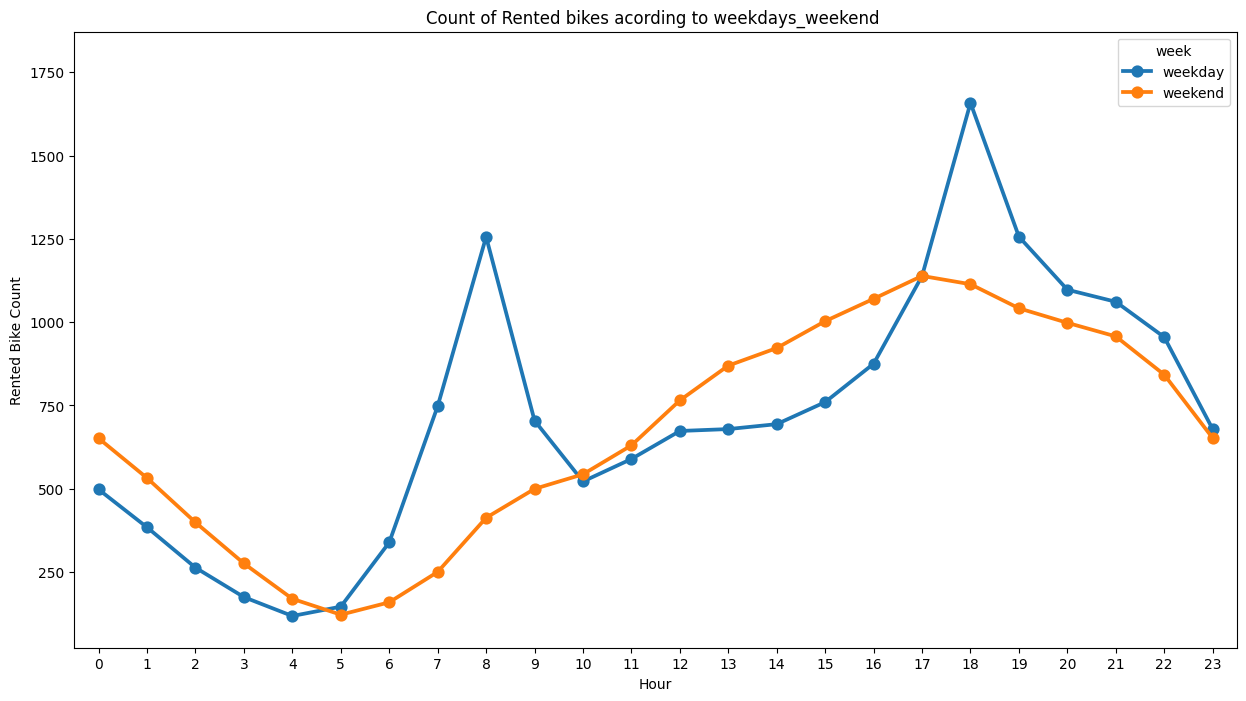

In [ ]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(15,8))
sns.pointplot(data=df,x='Hour',y='Rented Bike Count',hue='week',ax=ax,errwidth=0)
ax.set(title='Count of Rented bikes acording to weekdays_weekend ')

In [ ]:
#From the above point plot and bar plot we can say that in the week days which represent in blue colur show that the demand of the bike higher because of the office.
#Peak Time are 7 am to 9 am and 5 pm to 7 pm The orange colur represent the weekend days
#It show that the demand of rented bikes are very low specially in the morning hour but when the evening start from 4 pm to 8 pm the demand slightly increases

[Text(0.5, 1.0, 'Count of Rented bikes acording to Functioning Day ')]

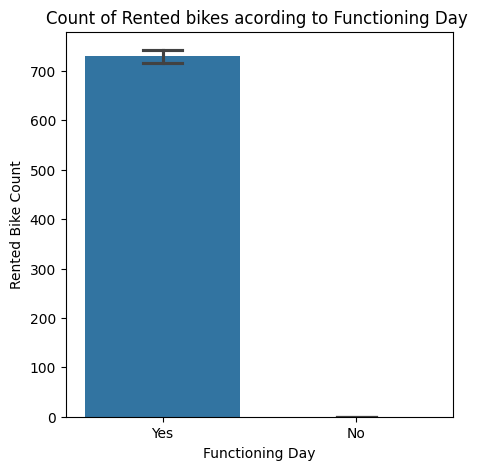

In [ ]:
#Functioning day
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(5,5))
sns.barplot(data=df,x='Functioning Day',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Functioning Day ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to Functioning Day ')]

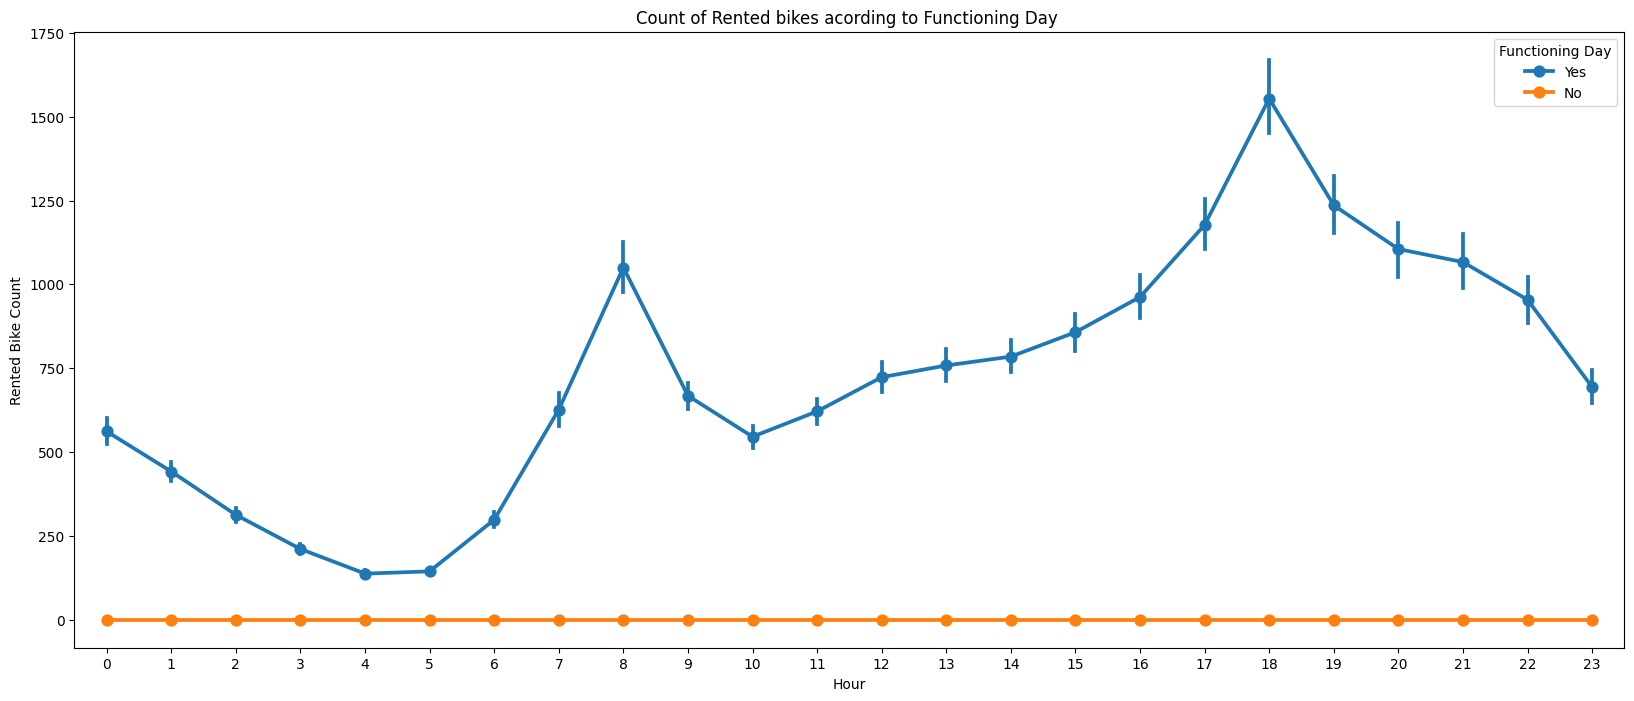

In [ ]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=df,x='Hour',y='Rented Bike Count',hue='Functioning Day',ax=ax)
ax.set(title='Count of Rented bikes acording to Functioning Day ')

In [ ]:
#In the above bar plot and point plot which shows the use of rented bike in functioning day or not
#it clearly shows that, Peoples dont use reneted bikes in no functioning day

[Text(0.5, 1.0, 'Count of Rented bikes acording to Seasons ')]

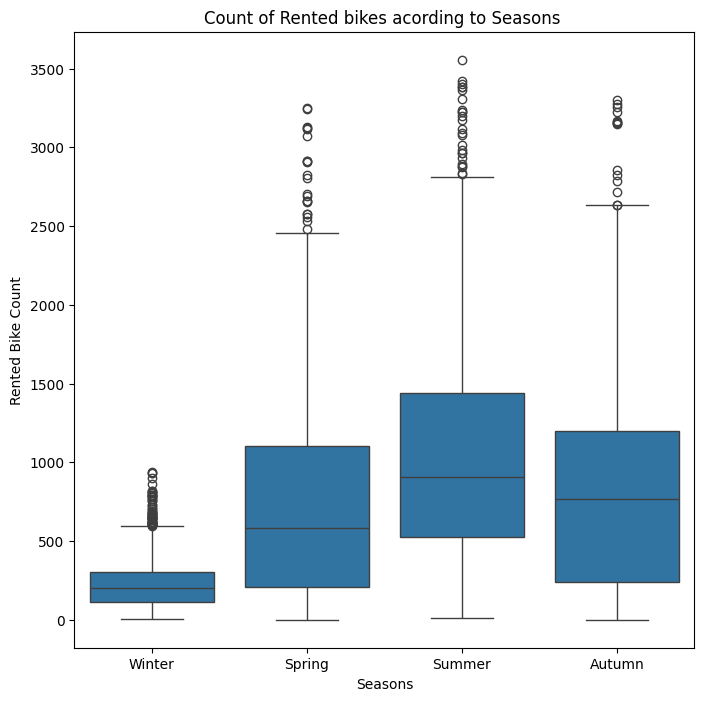

In [ ]:
#seasons
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(8,8))
sns.boxplot(data=df,x='Seasons',y='Rented Bike Count',ax=ax)
ax.set(title='Count of Rented bikes acording to Seasons ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to Seasons ')]

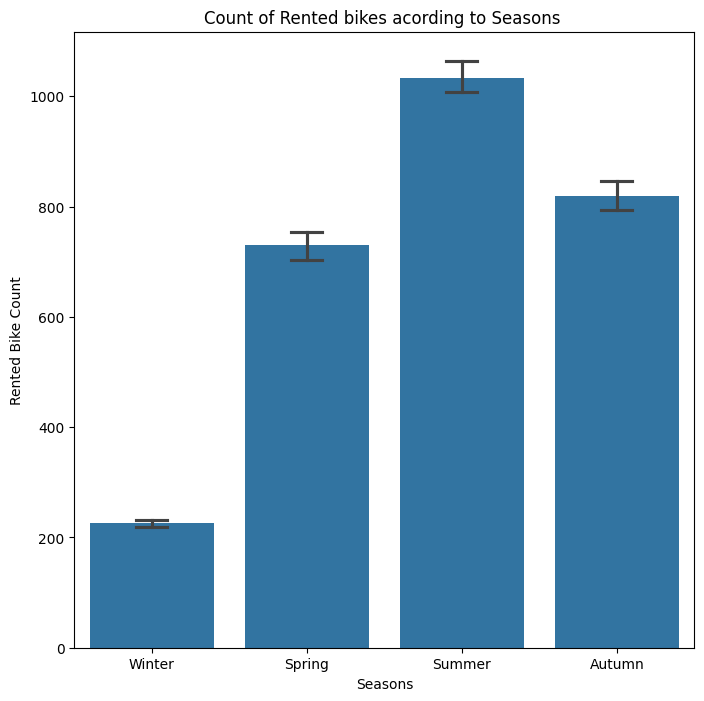

In [ ]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(8,8))
sns.barplot(data=df,x='Seasons',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Seasons ')

In [ ]:
#In the above box plot and bar plot which shows the use of rented bike in in four different seasons
#it clearly shows that, In summer season the use of rented bike is high In winter season the use of rented bike is very low because of snowfall.

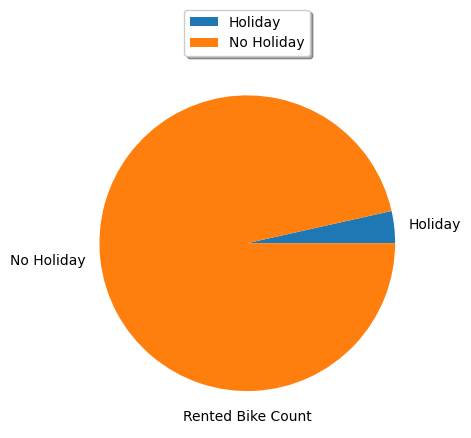

In [ ]:
# Plot the pie chart
df.groupby('Holiday').sum()['Rented Bike Count'].plot.pie(radius=1, ylabel='')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), shadow=True, ncol=1)

# Add a comment at the bottom of the plot
plt.text(0, -1.2, "Rented Bike Count", ha='center')

plt.show()


[Text(0.5, 1.0, 'Count of Rented bikes acording to Holiday ')]

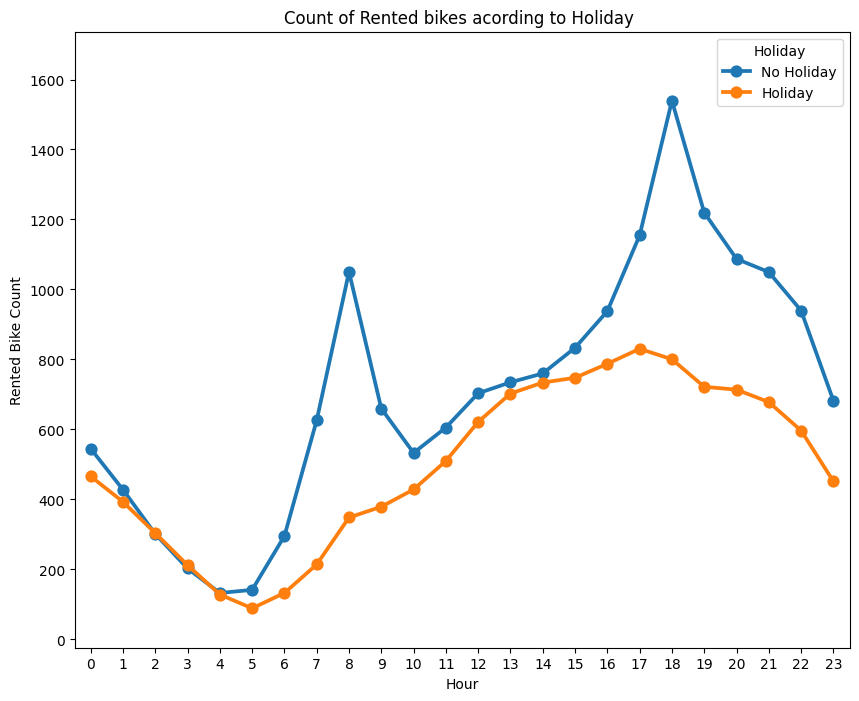

In [ ]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(10,8))
sns.pointplot(data=df,x='Hour',y='Rented Bike Count',hue='Holiday',ax=ax,errwidth=0)
ax.set(title='Count of Rented bikes acording to Holiday ')

In [ ]:
df.isna().sum()

Date                       0
Rented Bike Count          0
Hour                       0
Temperature(°C)            0
Humidity(%)                0
Wind speed (m/s)           0
Visibility (10m)           0
Solar Radiation (MJ/m2)    0
Rainfall(mm)               0
Snowfall (cm)              0
Seasons                    0
Holiday                    0
Functioning Day            0
month                      0
week                       0
dtype: int64

In [ ]:
#In the above pie plot and point plot which shows the use of rented bike in a holiday
#it clearly shows that in holiday people uses the rented bike from 2pm-8pm

In [ ]:
#Label Encoding

# creating dummy variables for categorical feature --> Seasons, month, DayOfWeek, year, fuctioning day, holiday

seasons = pd.get_dummies(df['Seasons'])

working_day = pd.get_dummies(df['Holiday'])

F_day = pd.get_dummies(df['Functioning Day'])

month = pd.get_dummies(df['month'])

week_day = pd.get_dummies(df['week'])

In [ ]:
df = pd.concat([df,seasons,working_day,F_day,month,week_day],axis=1)

In [ ]:
# checking the data dummy variable is created or not

df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),...,5,6,7,8,9,10,11,12,weekday,weekend
0,01-12-2017,254,0,-5.2,37.0,2.2,2000.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,1,0
1,01-12-2017,204,1,-5.5,38.0,0.8,2000.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,1,0
2,01-12-2017,173,2,-6.0,39.0,1.0,2000.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,1,0
3,01-12-2017,107,3,-6.2,40.0,0.9,2000.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,1,0
4,01-12-2017,78,4,-6.0,36.0,2.3,2000.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,1,0


In [ ]:
## dropping columns for which dummy variables were created

df.drop(['Seasons','Holiday','Functioning Day','week','month'],axis=1,inplace=True)
df.drop(['Date'],axis=1,inplace=True) # droping date because we already extract the date from the data

In [ ]:
df.head(5)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Autumn,...,5,6,7,8,9,10,11,12,weekday,weekend
0,254,0,-5.2,37.0,2.2,2000.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,1,1,0
1,204,1,-5.5,38.0,0.8,2000.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,1,1,0
2,173,2,-6.0,39.0,1.0,2000.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,1,1,0
3,107,3,-6.2,40.0,0.9,2000.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,1,1,0
4,78,4,-6.0,36.0,2.3,2000.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,1,1,0


In [ ]:
#checking multicollinearity

# function to calculate Multicollinearity

# checking the vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df


# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
vif_data['VIF'] = round(vif_data['VIF'],2)


print(vif_data)

                    feature   VIF
0         Rented Bike Count  2.22
1                      Hour  1.41
2           Temperature(°C)  3.97
3               Humidity(%)  2.33
4          Wind speed (m/s)  1.29
5          Visibility (10m)  1.75
6   Solar Radiation (MJ/m2)  1.62
7              Rainfall(mm)   NaN
8             Snowfall (cm)   NaN
9                    Autumn   inf
10                   Spring   inf
11                   Summer   inf
12                   Winter   inf
13               No Holiday  1.05
14                       No   inf
15                      Yes   inf
16                        1   inf
17                        2   inf
18                        3   inf
19                        4   inf
20                        5   inf
21                        6   inf
22                        7   inf
23                        8   inf
24                        9   inf
25                       10   inf
26                       11   inf
27                       12   inf
28            

In [ ]:
df=df.drop(['Rainfall(mm)','Snowfall (cm)'],axis=1)

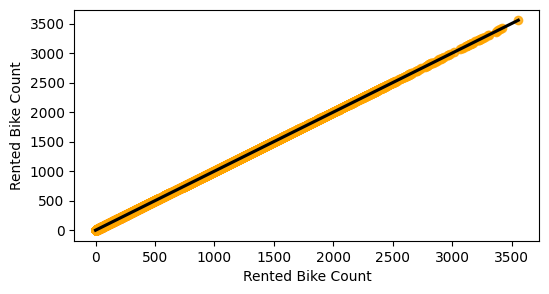

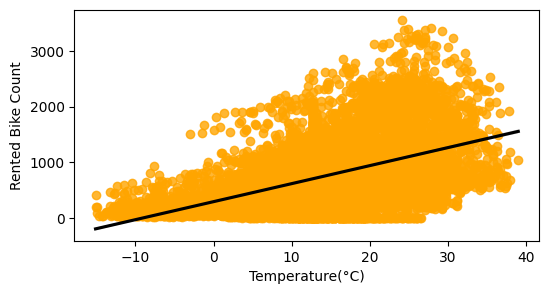

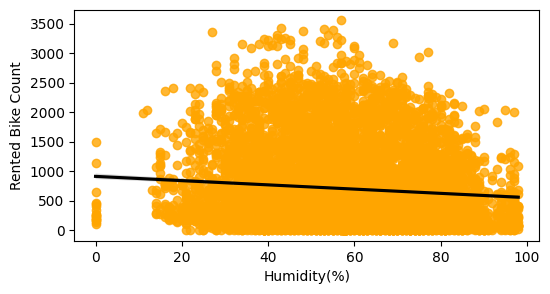

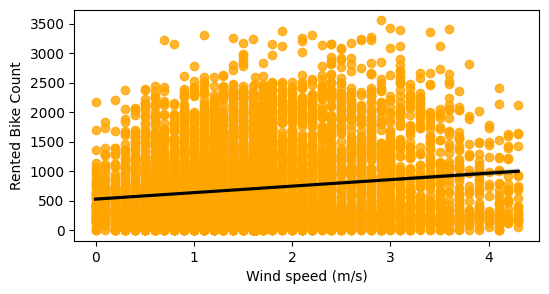

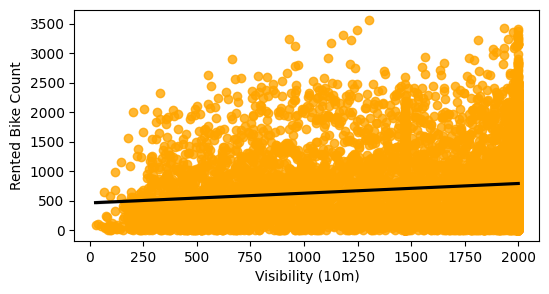

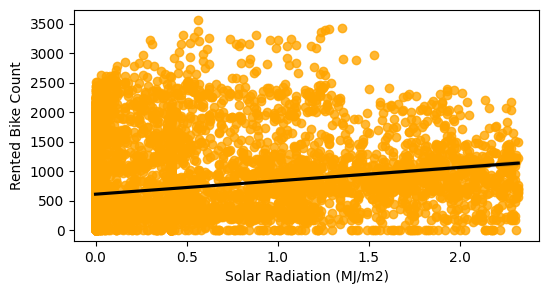

In [ ]:
#Regression plot

numerical_columns=['Rented Bike Count','Temperature(°C)','Humidity(%)',	'Wind speed (m/s)',	'Visibility (10m)',	'Solar Radiation (MJ/m2)'	]
#printing the regression plot for all the numerical features
for col in numerical_columns:
  fig,ax=plt.subplots(figsize=(6,3))
  sns.regplot(x=df[col],y=df['Rented Bike Count'],scatter_kws={"color": 'orange'}, line_kws={"color": "black"})

In [ ]:
#Assign the value in X and Y
X = df.drop(columns=['Rented Bike Count'], axis=1)
y = np.sqrt(df['Rented Bike Count'])

In [ ]:
#Create test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)
print(X_train.shape)
print(X_test.shape)

(6570, 27)
(2190, 27)


In [ ]:

# Convert feature names to string data type
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data (using the same scaler trained on the training data)
X_test_scaled = scaler.transform(X_test)


# Linear regression model


In [ ]:
#import the packages
from sklearn.linear_model import LinearRegression
reg= LinearRegression().fit(X_train, y_train)



In [ ]:
#check the score
reg.score(X_train, y_train)


0.6030365860108319

In [ ]:
#check the coefficeint
reg.coef_

array([ 5.42198013e-01,  3.92832793e-01, -1.23689449e-01,  4.55462577e-01,
       -1.38693781e-04, -2.50965423e-01,  2.78956339e+00,  4.50308925e-01,
        1.70921293e+00, -4.94908525e+00,  3.17766242e+00, -1.42326399e+01,
        1.42326399e+01, -2.71641358e+00, -1.68415147e+00, -2.09513636e+00,
       -3.13600240e-01,  2.85904552e+00,  4.89510126e+00, -5.35184844e-01,
       -2.65070349e+00,  1.44524357e+00,  1.93616376e+00, -5.91843928e-01,
       -5.48520194e-01,  5.93976840e-01, -5.93976840e-01])

In [ ]:
#get the X_train and X-test value
y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test)

In [ ]:
y_pred_test

array([19.65493509, 23.6042643 , 21.24434487, ..., 32.90762414,
        0.9909005 , 26.28938436])

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
#calculate MSE
MSE_lr= mean_squared_error((y_train), (y_pred_train))
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_train, y_pred_train)
print("MAE :",MAE_lr)



#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score(y_train, y_pred_train)
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

print("Adjusted R2 :",Adjusted_R2_lr)

MSE : 61.12866557848495
RMSE : 7.818482306591539
MAE : 5.911175024391997
R2 : 0.6030365860108319
Adjusted R2 : 0.5980791335697091


# linear regression with L2 regularization

In [ ]:
#import the packages
from sklearn.linear_model import Ridge

ridge= Ridge(alpha=0.1)


In [ ]:
#FIT THE MODEL
ridge.fit(X_train,y_train)


Ridge(alpha=0.1)

In [ ]:
#check the score
ridge.score(X_train, y_train)


0.6030365729989227

In [ ]:
#get the X_train and X-test value
y_pred_train_ridge=ridge.predict(X_train)
y_pred_test_ridge=ridge.predict(X_test)

In [ ]:
# evaluating metrics
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE  = mean_squared_error(y_test,y_pred_test_ridge)
print("MSE :" , MSE)
#calculate RMSE
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
#calculate r2 and adjusted r2
r2_ridge_test = r2_score(y_test,y_pred_test_ridge)
print("R2 :" ,r2_ridge_test)
print("Adjusted R2 : ",1-(1-r2_score(y_test,y_pred_test_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 60.32281416147696
RMSE : 7.76677630432839
R2 : 0.6181288369925382
Adjusted R2 :  0.613359863171446


# Decision tree

In [ ]:
# training model

from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [ ]:
Y_pred_train =regressor.predict(X_train)
Y_pred_train

array([19.55740252, 29.37807057, 11.04536102, ..., 28.25295474,
       20.02498439, 22.64950331])

In [ ]:
Y_pred_test = regressor.predict(X_test)
Y_pred_test


array([19.79898987, 24.49489743, 14.62873884, ..., 35.02727296,
        0.        , 20.85281734])

In [ ]:
r2_score(Y_pred_train,y_train)

0.9565092151304044

In [ ]:
DT = r2_score(Y_pred_test,y_test)
DT

0.8363133548293877

Decision tree with gridsearch cv

In [ ]:
# Tunning the hyper parameters with GridSearchCV
param = {'max_depth' : [1,4,5,6,7,10,15,20,8]}

regressor_gs_cv =GridSearchCV(regressor ,param,scoring='r2',cv=5)
regressor_gs_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [1, 4, 5, 6, 7, 10, 15, 20, 8]},
             scoring='r2')

In [ ]:
#looking at the best estimator
regressor_gs_cv.best_estimator_

DecisionTreeRegressor(max_depth=10, random_state=0)

In [ ]:
#checking the score with best parameters
DT_with_cv = regressor_gs_cv.score(X_test,y_test)
DT_with_cv

0.8485070057274662

In [ ]:
print(f'The r2 score of decision tree is {r2_score(Y_pred_test,y_test)}')

print(f'the r2 score of decision tree with hyper perameteres tunning is {regressor_gs_cv.score(X_test,y_test)} ')


The r2 score of decision tree is 0.8363133548293877
the r2 score of decision tree with hyper perameteres tunning is 0.8485070057274662 


# Random ForestRegressor with GridSearchCV

In [ ]:
from sklearn.ensemble import RandomForestRegressor

#implementing the model
rf_reg = RandomForestRegressor(n_estimators = 1000, random_state=5)

#training the model
rf_reg.fit(X_train, y_train)

#defining the predicted variables
pred_train = rf_reg.predict(X_train)
pred_test = rf_reg.predict(X_test)
MSE_train = mean_squared_error(y_train, pred_train)
print(f'MSE= {MSE_train}')

RMSE_train = np.sqrt(MSE_train)
print(f'RMSE= {RMSE_train}')

R2_Score_train = r2_score(y_train, pred_train)
print(f'R2_Score_train= {R2_Score_train}')

MSE_test = mean_squared_error(y_test, pred_test)
print(f'MSE= {MSE_test}')

RMSE_test = np.sqrt(MSE_test)
print(f'RMSE= {RMSE_test}')

R2_Score_test = r2_score(y_test, pred_test)
print(f'R2_Score_test= {R2_Score_test}')

MSE= 7.548702471971489
RMSE= 2.7474902132621852
R2_Score_train= 0.9509794844022089
MSE= 17.466110425154667
RMSE= 4.179247590793667
R2_Score_test= 0.8894314863458409


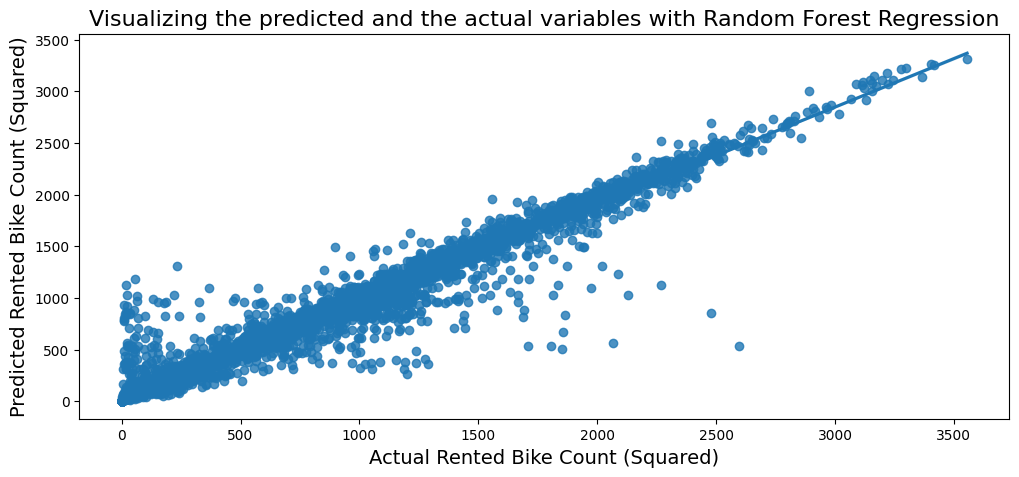

In [ ]:
plt.figure(figsize=(12, 5))
sns.regplot(x=y_train*y_train, y=pred_train*pred_train)
plt.title('Visualizing the predicted and the actual variables with Random Forest Regression', size=16)
plt.xlabel('Actual Rented Bike Count (Squared)', size=14)
plt.ylabel('Predicted Rented Bike Count (Squared)', size=14)
plt.show()


SVR using grid searchcv

In [ ]:
# selecting the values of SVR
param = {'C' : [1,5,10],'degree' : [3,8],'coef0' : [0.01,10,0.5],'gamma' : ('auto','scale')},

#train the model
modelsvr = SVR(kernel='rbf')
grids = GridSearchCV(modelsvr,param,cv=3)
grids.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=SVR(),
             param_grid=({'C': [1, 5, 10], 'coef0': [0.01, 10, 0.5],
                          'degree': [3, 8], 'gamma': ('auto', 'scale')},))

In [ ]:
# predicting for both train and test
y_pred_train3=grids.predict(X_train)
y_pred_test3=grids.predict(X_test)

In [ ]:
# finding each of the metrics for training set

print('The MAE of training set = ',mean_absolute_error(y_train, y_pred_train3))
print('The MSE of training set = ',mean_squared_error(y_train, y_pred_train3))
print('The R2_score of training set = ',r2_score(y_train, y_pred_train3))

The MAE of training set =  2.7158266057401237
The MSE of training set =  30.70414961288412
The R2_score of training set =  0.8006103365970653


In [ ]:
# finding each metrics for test set
svr = r2_score(y_test, y_pred_test3)
print('The MAE of test set = ',mean_absolute_error(y_test, y_pred_test3))
print('The MSE of test set = ',mean_squared_error(y_test, y_pred_test3))
print('The R2_score of test set = ',r2_score(y_test, y_pred_test3))

The MAE of test set =  6.953258584189396
The MSE of test set =  93.55612818416209
The R2_score of test set =  0.40774667142474674


In [ ]:
#comparing the model with r2 value

models= ['Ridge_model','Decision_Tree_model','Decision_Tree_model_gridcv','random forest','SVR']
R2_value= [r2_ridge_test,DT,DT_with_cv,R2_Score_test,svr]
compare_models = pd.DataFrame([R2_value],columns=models,index =['r2_value'])
compare_models

,Ridge_model,Decision_Tree_model,Decision_Tree_model_gridcv,random forest,SVR
r2_value,0.618129,0.836313,0.848507,0.889431,0.407747


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Ridge_model']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Ridge_model'}, axis=1)
              .sort_values('Ridge_model', ascending=True))
  xs = counted['Ridge_model']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_0.sort_values('Ridge_model', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Ridge_model')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Decision_Tree_model']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Decision_Tree_model'}, axis=1)
              .sort_values('Decision_Tree_model', ascending=True))
  xs = counted['Decision_Tree_model']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('Decision_Tree_model', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Decision_Tree_model')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Decision_Tree_model_gridcv']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Decision_Tree_model_gridcv'}, axis=1)
              .sort_values('Decision_Tree_model_gridcv', ascending=True))
  xs = counted['Decision_Tree_model_gridcv']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('Decision_Tree_model_gridcv', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Decision_Tree_model_gridcv')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['random forest']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'random forest'}, axis=1)
              .sort_values('random forest', ascending=True))
  xs = counted['random forest']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('random forest', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('random forest')
_ = plt.ylabel('count()')